# Matthew Altaie's Capstone EDA

## Introduction

ICU Mortality Prediction focuses on patient health through data from MIT’s GOSSIS (Global Open Source Severity of Illness Score) initiative. The data gathered is used  to predict the likelihood of a person suffering an illness or death for numerous diseases.

## Objective

The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival. MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.<br>

**Data sources**: <br>
https://physionet.org/content/widsdatathon2020/1.0.0/ <br>
https://www.kaggle.com/c/widsdatathon2020/

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost as xgb

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


%matplotlib inline

#### Importing data

In [2]:
hospital_test_csv = r'C:\Users\matta\Downloads\Data\hospital_test.csv'
hospital_test = pd.read_csv(hospital_test_csv)
hospital_train_csv = r'C:\Users\matta\Downloads\Data\hospital_train.csv'
hospital_train = pd.read_csv(hospital_train_csv)

In [3]:
hospital_train.shape

(91713, 186)

In [4]:
hospital_test.shape

(39308, 186)

In [5]:
hospital_train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [6]:
hospital_test.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,NaN,66.0,32.518596,1,African American,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,NaN,64.0,20.798520,0,Caucasian,M,182.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,NaN,56.0,NaN,0,Caucasian,M,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


**Note**: hospital_death is the target variable

#### Convert gender to binary

In [7]:
hospital_train['gender'] = hospital_train['gender'].map({'M': 1, 'F': 0})
hospital_test['gender'] = hospital_test['gender'].map({'M': 1, 'F': 0})

In [8]:
hospital_train.info

<bound method DataFrame.info of        encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250

In [9]:
hospital_train.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,gender,height,icu_id,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,91688.000000,90379.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,0.539536,169.641588,508.357692,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,0.498437,10.795378,228.989661,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,0.000000,137.200000,82.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,0.000000,162.500000,369.000000,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,1.000000,170.100000,504.000000,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,1.000000,177.800000,679.000000,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,1.000000,195.590000,927.000000,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
hospital_train['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [11]:
hospital_train['hospital_death'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

Baseline accuracy is **91.3%**

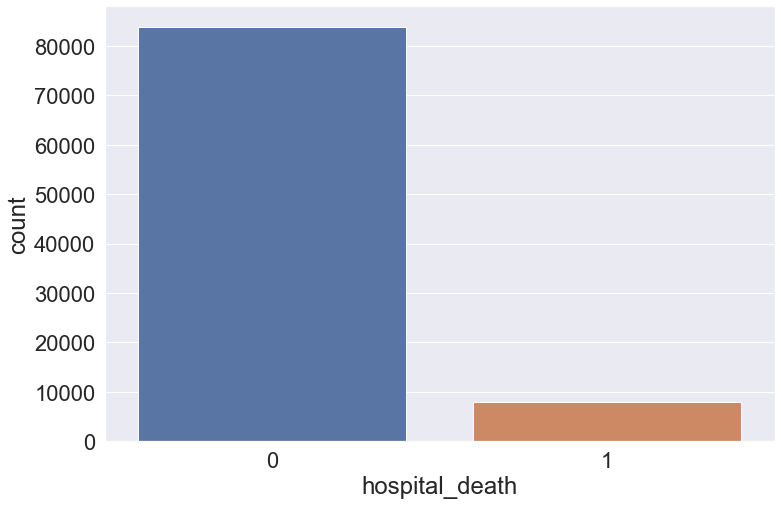

In [12]:
fig = plt.figure(figsize = (12,8));
sns.set_style("darkgrid")
sns.set(font_scale=2)
sns.countplot(data=hospital_train, x = 'hospital_death');
plt.show();

Code below is from <br> https://www.statology.org/seaborn-barplot-show-values/ 

In [13]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

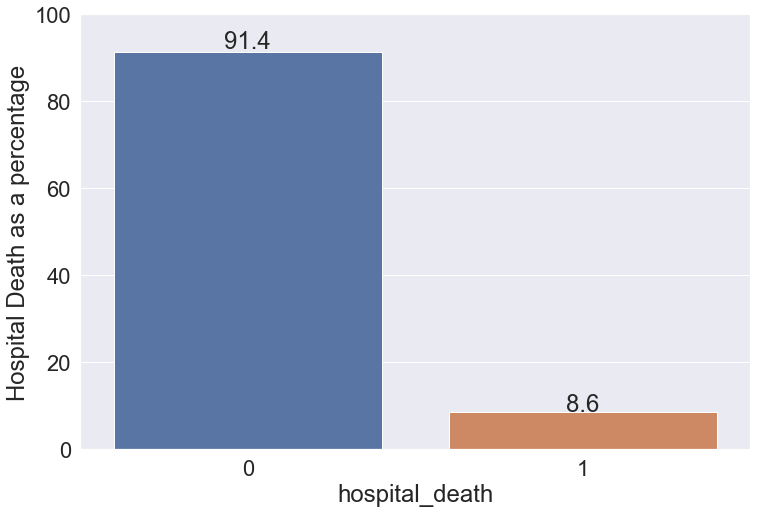

In [14]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="hospital_death", y="hospital_death", data=hospital_train, estimator=lambda x: len(x) / len(hospital_train) * 100)
ax.set(ylabel="Hospital Death as a percentage")
ax.set(ylim = (0,100))
show_values(ax)

#### Dropping irrelevant columns

In [15]:
hospital_train.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [16]:
hospital_train.shape

(91713, 186)

In [17]:
hospital_train = hospital_train.drop(['hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'ethnicity', 'height', 'encounter_id', 'patient_id', 'hospital_id', 'apache_3j_bodysystem', 'apache_2_bodysystem'], axis = 1) # consider these , 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'.

**Note**: may need to reverse the bodysystem change here

In [18]:
hospital_train.shape

(91713, 174)

In [19]:
hospital_test = hospital_test.drop(['hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'ethnicity', 'height', 'encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'apache_3j_bodysystem', 'apache_2_bodysystem'], axis = 1) #consider these , 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'

In [20]:
hospital_test.shape

(39308, 173)

**note**: The difference in shapes comes from the removal of the empty hospital_death feature from the test set

In [21]:
y = hospital_train['hospital_death']
X = hospital_train.drop('hospital_death', axis= 1)

In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

In [23]:
X

,age,bmi,elective_surgery,gender,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,68.0,22.730000,0,1.0,0.541667,0,73.9,2.3,113.0,502.01,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,77.0,27.420000,0,0.0,0.927778,0,70.2,NaN,108.0,203.01,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,31.950000,0,0.0,0.000694,0,95.3,NaN,122.0,703.03,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.0,22.640000,1,0.0,0.000694,0,61.7,NaN,203.0,1206.03,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,NaN,0,1.0,0.073611,0,NaN,NaN,119.0,601.01,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,1.0,0.298611,0,72.9,NaN,113.0,501.06,...,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,56.0,47.179671,0,0.0,0.120139,0,158.0,NaN,113.0,501.05,...,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,48.0,27.236914,0,1.0,0.046528,0,78.9,2.9,123.0,702.01,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,NaN,23.297481,0,0.0,0.081944,0,55.9,NaN,108.0,203.01,...,0.07,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation

In [24]:
corr_prime = hospital_train.corr()

In [25]:
corr = hospital_train.corrwith(hospital_train['hospital_death'], axis = 0) #This shows the correlation of the diagnosis columns with other columns
corr

hospital_death                 1.000000
age                            0.111017
bmi                           -0.031247
elective_surgery              -0.093574
gender                        -0.007024
                                 ...   
hepatic_failure                0.038864
immunosuppression              0.043973
leukemia                       0.029788
lymphoma                       0.018722
solid_tumor_with_metastasis    0.051105
Length: 174, dtype: float64

In [26]:
# corr_short = corr[((corr > 0.2)|(corr < -0.2))] #I set my threshold for good correlation for correlation >0.25 and <-0.25
# corr_short #this is a list of all the variables I will be using for my predictor variables

corr_short = corr[(corr != 1.0)&((corr > 0.2)|(corr < -0.2))] #I set my threshold for good correlation for correlation >0.25 and <-0.25
corr_short #this is a list of all the variables I will be using for my predictor variables

fio2_apache                      0.212249
gcs_eyes_apache                 -0.260373
gcs_motor_apache                -0.282449
gcs_verbal_apache               -0.241044
ph_apache                       -0.205075
ventilated_apache                0.228661
d1_mbp_invasive_min             -0.222350
d1_spo2_min                     -0.210100
d1_sysbp_invasive_min           -0.234382
d1_sysbp_min                    -0.210170
d1_sysbp_noninvasive_min        -0.209926
d1_temp_min                     -0.207239
d1_albumin_min                  -0.200590
d1_lactate_max                   0.399029
d1_lactate_min                   0.403614
h1_albumin_max                  -0.224928
h1_albumin_min                  -0.225402
h1_lactate_max                   0.340951
h1_lactate_min                   0.344046
d1_arterial_ph_min              -0.230365
h1_arterial_ph_max              -0.207716
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
dtype: float64

In [27]:
type(corr_short)

pandas.core.series.Series

In [28]:
corr_short.index

Index(['fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'ph_apache', 'ventilated_apache',
       'd1_mbp_invasive_min', 'd1_spo2_min', 'd1_sysbp_invasive_min',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min',
       'd1_albumin_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_lactate_max', 'h1_lactate_min',
       'd1_arterial_ph_min', 'h1_arterial_ph_max',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'],
      dtype='object')

In [29]:
corr_prime.loc[corr_short.index, corr_short.index]

,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ph_apache,ventilated_apache,d1_mbp_invasive_min,d1_spo2_min,d1_sysbp_invasive_min,d1_sysbp_min,...,d1_lactate_max,d1_lactate_min,h1_albumin_max,h1_albumin_min,h1_lactate_max,h1_lactate_min,d1_arterial_ph_min,h1_arterial_ph_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
fio2_apache,1.000000,-0.171819,-0.178063,-0.185506,-0.220608,0.280052,-0.126260,-0.197774,-0.159592,-0.174945,...,0.235614,0.221225,-0.119174,-0.119557,0.220520,0.215933,-0.251179,-0.130063,0.246231,0.258017
gcs_eyes_apache,-0.171819,1.000000,0.800127,0.779128,0.079302,-0.488464,0.195080,0.090901,0.208037,0.166986,...,-0.236217,-0.191159,0.135316,0.136149,-0.244969,-0.238992,0.135593,0.152151,-0.411935,-0.388813
gcs_motor_apache,-0.178063,0.800127,1.000000,0.699706,0.099811,-0.434998,0.186215,0.101690,0.204519,0.158675,...,-0.271494,-0.232387,0.129198,0.129998,-0.277519,-0.271846,0.155287,0.150053,-0.440726,-0.428237
gcs_verbal_apache,-0.185506,0.779128,0.699706,1.000000,0.033022,-0.563364,0.212523,0.083908,0.227170,0.176938,...,-0.212832,-0.168677,0.155871,0.156619,-0.218945,-0.213147,0.097126,0.099800,-0.400620,-0.363716
ph_apache,-0.220608,0.079302,0.099811,0.033022,1.000000,-0.058881,0.217596,0.217905,0.262649,0.215369,...,-0.390049,-0.368594,0.150387,0.150796,-0.289102,-0.289752,0.767755,0.610597,-0.178188,-0.205283
ventilated_apache,0.280052,-0.488464,-0.434998,-0.563364,-0.058881,1.000000,-0.292013,-0.119281,-0.307022,-0.210045,...,0.212736,0.165253,-0.184985,-0.185618,0.189022,0.182897,-0.161335,-0.096498,0.298009,0.284239
d1_mbp_invasive_min,-0.126260,0.195080,0.186215,0.212523,0.217596,-0.292013,1.000000,0.223649,0.723473,0.434813,...,-0.259296,-0.264678,0.259533,0.259512,-0.228688,-0.234579,0.255591,0.137188,-0.191048,-0.190741
d1_spo2_min,-0.197774,0.090901,0.101690,0.083908,0.217905,-0.119281,0.223649,1.000000,0.245531,0.226480,...,-0.284399,-0.262095,0.136848,0.136800,-0.217639,-0.219281,0.233753,0.174157,-0.140233,-0.134496
d1_sysbp_invasive_min,-0.159592,0.208037,0.204519,0.227170,0.262649,-0.307022,0.723473,0.245531,1.000000,0.507612,...,-0.296643,-0.297514,0.270800,0.271287,-0.243395,-0.251571,0.308952,0.188853,-0.195578,-0.201564
d1_sysbp_min,-0.174945,0.166986,0.158675,0.176938,0.215369,-0.210045,0.434813,0.226480,0.507612,1.000000,...,-0.251068,-0.239109,0.301100,0.301780,-0.217886,-0.224101,0.252761,0.164942,-0.199499,-0.181044


In [30]:
corr_prime[['fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'ph_apache', 'ventilated_apache',
       'd1_mbp_invasive_min', 'd1_spo2_min', 'd1_sysbp_invasive_min',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min',
       'd1_albumin_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_lactate_max', 'h1_lactate_min',
       'd1_arterial_ph_min', 'h1_arterial_ph_max',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']]

,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ph_apache,ventilated_apache,d1_mbp_invasive_min,d1_spo2_min,d1_sysbp_invasive_min,d1_sysbp_min,...,d1_lactate_max,d1_lactate_min,h1_albumin_max,h1_albumin_min,h1_lactate_max,h1_lactate_min,d1_arterial_ph_min,h1_arterial_ph_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
hospital_death,0.212249,-0.260373,-0.282449,-0.241044,-0.205075,0.228661,-0.222350,-0.210100,-0.234382,-0.210170,...,0.399029,0.403614,-0.224928,-0.225402,0.340951,0.344046,-0.230365,-0.207716,0.311043,0.283913
age,0.037935,0.026363,0.025843,-0.017829,0.046525,0.041296,-0.113051,-0.084488,0.009622,-0.060160,...,0.020474,0.042084,-0.120562,-0.120596,-0.007298,-0.004765,0.055960,0.097520,0.143167,0.076275
bmi,0.036961,0.012927,0.021091,0.028515,-0.051723,0.071014,-0.002731,-0.024743,-0.011150,0.052352,...,-0.018502,-0.016945,0.022371,0.021668,-0.021472,-0.021543,-0.060157,-0.081631,-0.033546,-0.013796
elective_surgery,-0.013290,0.009830,0.015783,-0.013365,0.045551,0.146526,0.036367,0.036399,0.048171,0.029359,...,0.006596,-0.011856,-0.107818,-0.107868,-0.038094,-0.046860,0.011893,0.190507,-0.098412,-0.061250
gender,0.057984,-0.002041,-0.012926,0.000296,0.008501,0.022046,0.006056,0.010997,0.017857,0.039500,...,0.006593,0.006340,0.049662,0.049590,0.016400,0.012568,0.017129,0.028014,-0.015391,-0.006846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatic_failure,0.011159,-0.013279,-0.005705,-0.009501,-0.005717,-0.005178,-0.038142,-0.008266,-0.038052,-0.044671,...,0.076402,0.087541,-0.084318,-0.084504,0.076542,0.079268,-0.009314,-0.006324,0.024115,0.026941
immunosuppression,-0.001267,0.018719,0.017957,0.022844,0.004691,-0.002724,-0.015462,-0.017636,-0.019848,-0.033663,...,0.006141,0.010093,-0.094577,-0.094442,0.002720,0.003256,0.017106,0.015582,0.038922,0.026268
leukemia,0.014345,0.001230,0.005132,0.008095,-0.008173,-0.002082,-0.018351,-0.017838,-0.018414,-0.021674,...,0.016727,0.018112,-0.031770,-0.032018,-0.000148,0.000407,0.002729,0.011866,0.044126,0.031966
lymphoma,0.016524,0.008648,0.005408,0.007984,-0.002340,-0.003462,-0.010336,-0.009755,-0.007897,-0.016623,...,0.022074,0.018559,-0.022488,-0.022719,0.003954,0.003643,0.000786,0.014023,0.018303,0.011287


<AxesSubplot:>

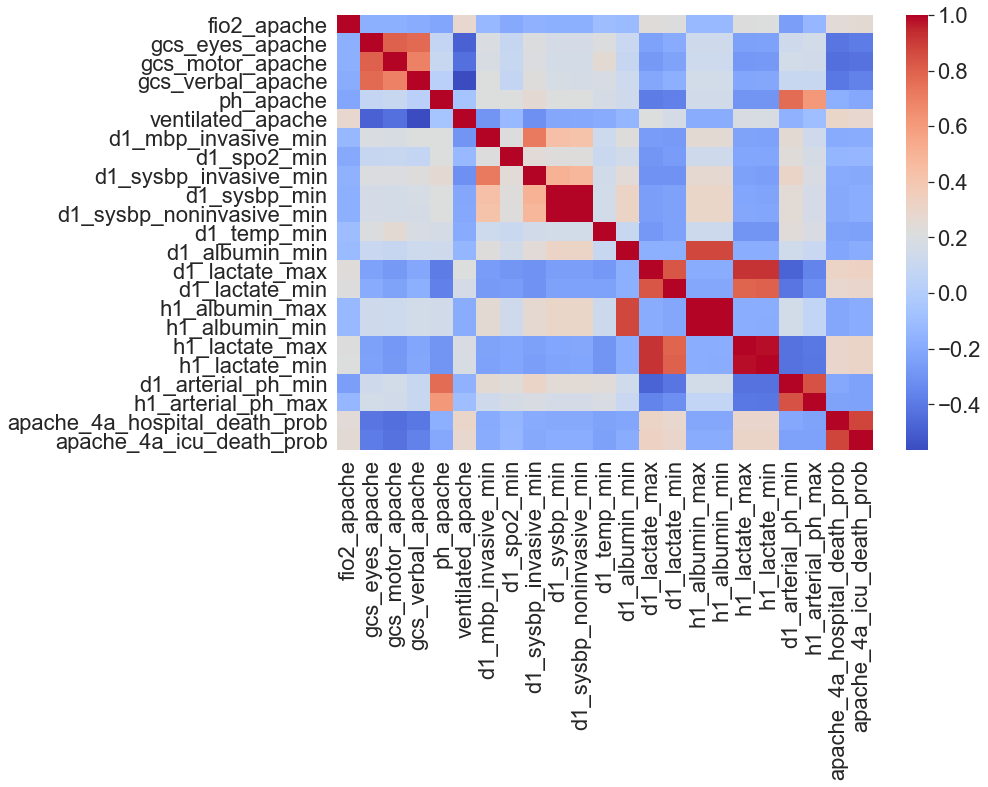

In [31]:
plt.figure (figsize = (12,8))
sns.heatmap(corr_prime.loc[corr_short.index, corr_short.index], 
        xticklabels=corr_short.index,
        yticklabels=corr_short.index, cmap = 'coolwarm', annot = False) 

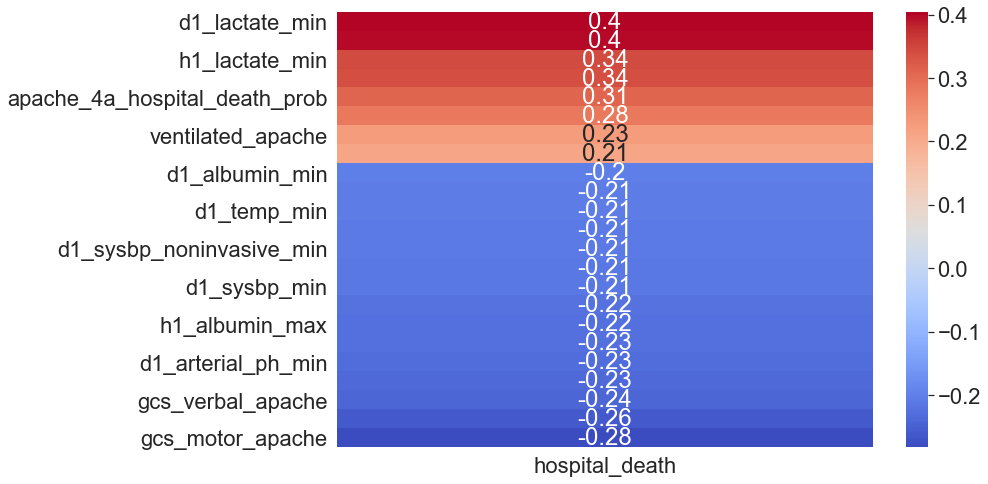

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_prime.loc[corr_short.index, ['hospital_death']].sort_values(by=['hospital_death'],ascending=False),
            cmap='coolwarm',
            annot=True);

The above features are the ones with the highest correlation to the hopsital_death target variable

**Note**: The following graph is showing a the correlation of a few chosen features for presentation purposes.

In [63]:
lst = ['d1_lactate_min', 'h1_lactate_min', 'ventilated_apache', 'fio2_apache', 'gcs_motor_apache', 'ph_apache', 'd1_sysbp_invasive_min', 'h1_albumin_min', 'gcs_motor_apache']

Text(0.5, 1.0, 'Feature correlation with the target (hospital_death)')

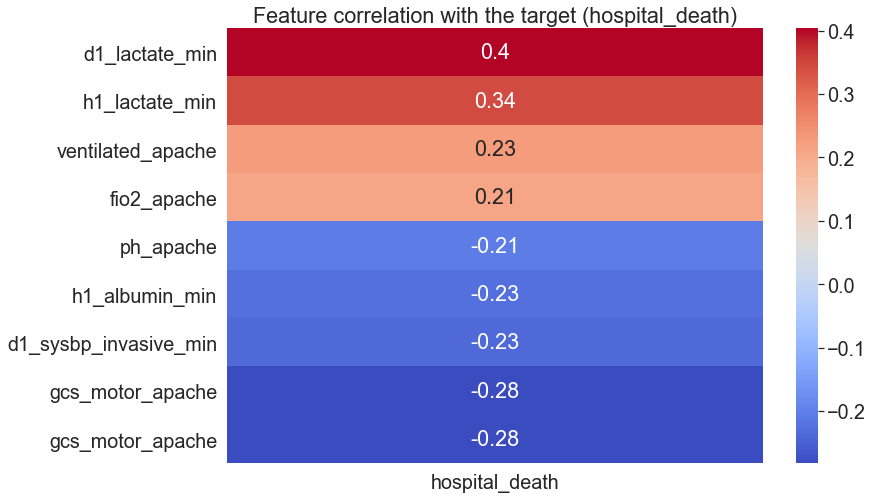

In [69]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.8)
sns.heatmap(corr_prime.loc[lst, ['hospital_death']].sort_values(by=['hospital_death'],ascending=False),
            cmap='coolwarm',
            annot=True);
plt.title ('Feature correlation with the target (hospital_death)')

#### Graphs

**Death as a function of blood lactate concentration**

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


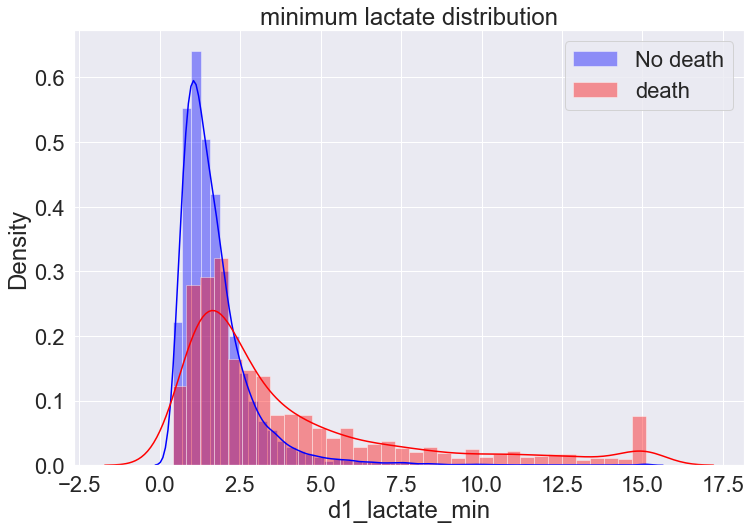

In [33]:
fig = plt.figure(figsize = (12,8));
sns.distplot(hospital_train[hospital_train['hospital_death'] == 0]["d1_lactate_min"], color='blue',kde=True, label = 'No death');
sns.distplot(hospital_train[hospital_train['hospital_death'] == 1]["d1_lactate_min"], color='red',kde=True, label = 'death');
plt.title('minimum lactate distribution');
plt.legend (loc = 'best')
plt.show();


**P value test**

In [70]:
# stats.ttest_ind(hospital_train[hospital_train['hospital_death'] == 0]["d1_lactate_min"], hospital_train[hospital_train['hospital_death'] == 1]["d1_lactate_min"])[1] #the [1] shows the p_value

**Death as a function of motor function response**

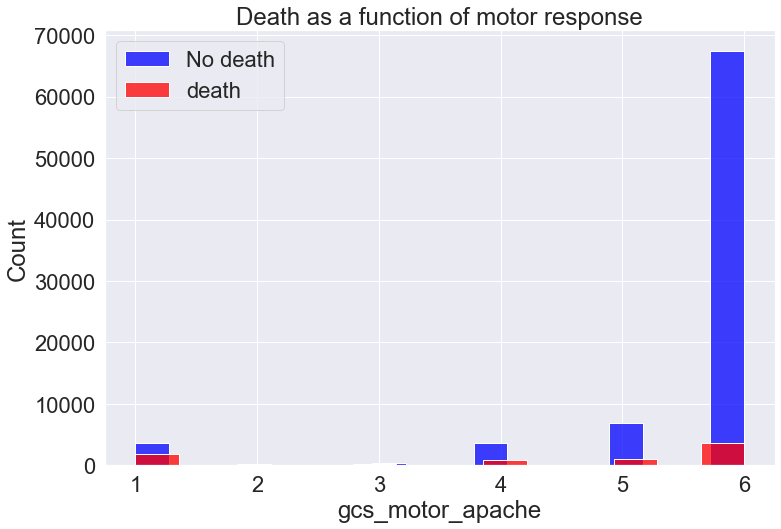

In [35]:
fig = plt.figure(figsize = (12,8));
sns.histplot(hospital_train[hospital_train['hospital_death'] == 0]["gcs_motor_apache"], color='blue', label = 'No death');
sns.histplot(hospital_train[hospital_train['hospital_death'] == 1]["gcs_motor_apache"], color='red', label = 'death');
plt.title('Death as a function of motor response');
plt.legend (loc = 'best')
plt.show();


**Death as a function of age**

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


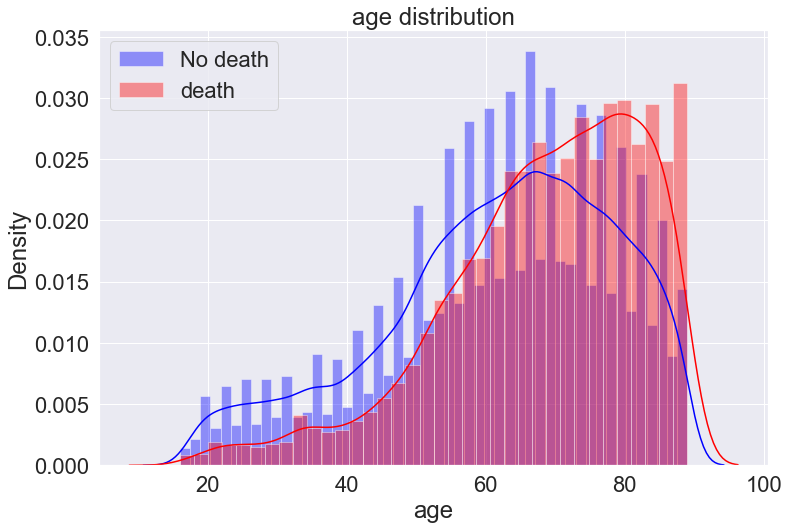

In [36]:
fig = plt.figure(figsize = (12,8));
sns.distplot(hospital_train[hospital_train['hospital_death'] == 0]["age"], color='blue',kde=True, label = 'No death');
sns.distplot(hospital_train[hospital_train['hospital_death'] == 1]["age"], color='red',kde=True, label = 'death');
plt.title('age distribution');
plt.legend (loc = 'best')
plt.show();


**Albumin distribution**

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


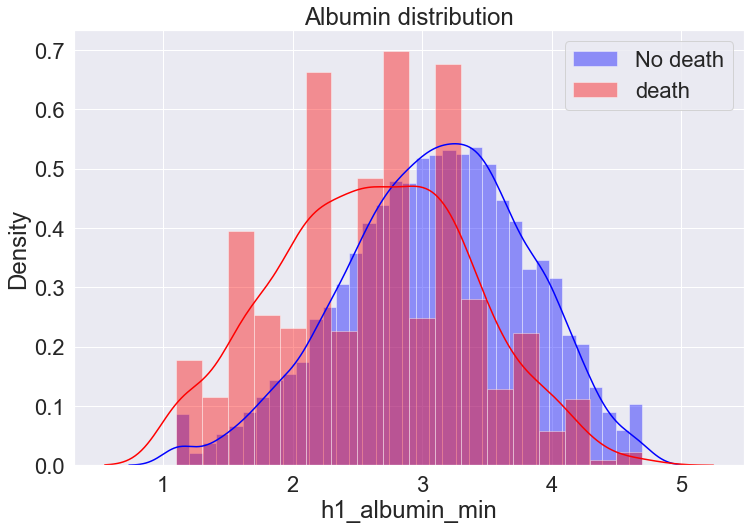

In [37]:
fig = plt.figure(figsize = (12,8));
sns.distplot(hospital_train[hospital_train['hospital_death'] == 0]["h1_albumin_min"], color='blue',kde=True, label = 'No death');
sns.distplot(hospital_train[hospital_train['hospital_death'] == 1]["h1_albumin_min"], color='red',kde=True, label = 'death');
plt.title('Albumin distribution');
plt.legend (loc = 'best')
plt.show();

### Lactate distribution with death

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


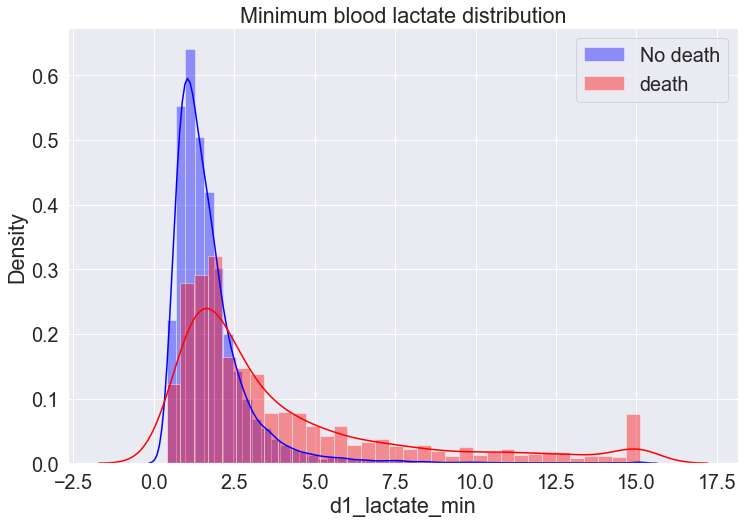

In [72]:
fig = plt.figure(figsize = (12,8));
sns.distplot(hospital_train[hospital_train['hospital_death'] == 0]["d1_lactate_min"], color='blue',kde=True, label = 'No death');
sns.distplot(hospital_train[hospital_train['hospital_death'] == 1]["d1_lactate_min"], color='red',kde=True, label = 'death');
plt.title('Minimum blood lactate distribution');
plt.legend (loc = 'best')
plt.show();

**Notes**: People who died have had higher blood lactate levels than people who survived

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'fio2_apache distribution')

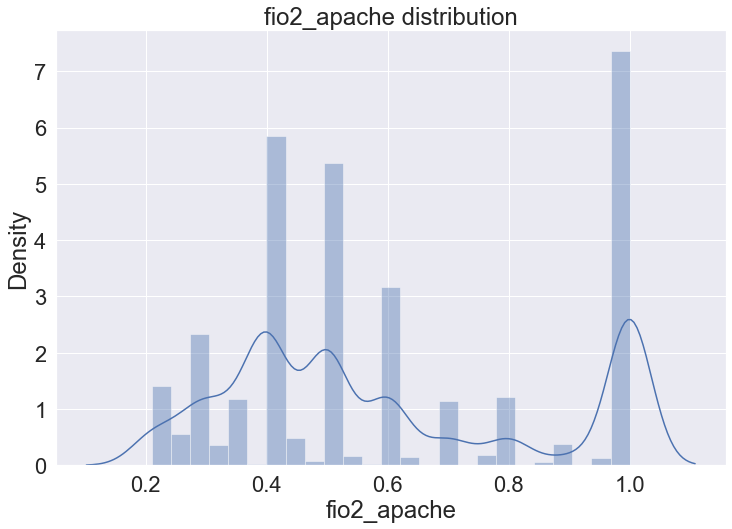

In [38]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['fio2_apache'])
plt.xlabel('fio2_apache')
plt.title ('fio2_apache distribution')

**Note**: fio2_apache: 77% missing. Fill with mean? Random assortment of numbers between 0.2 and 1?

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'gcs_eyes_apache distribution')

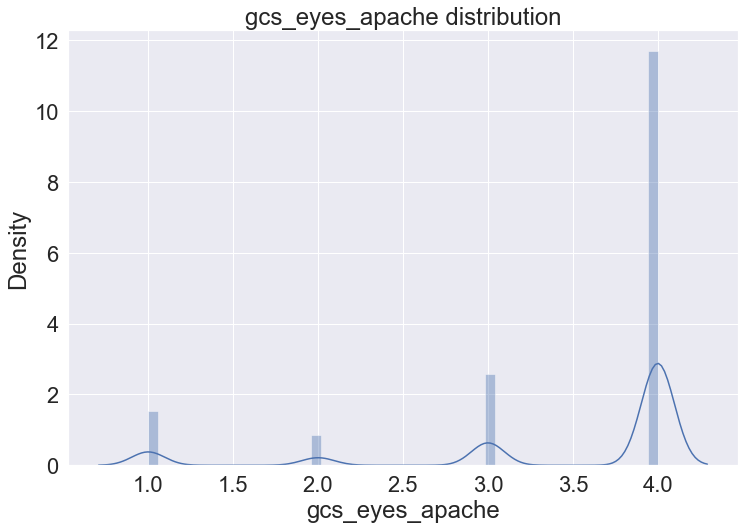

In [39]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['gcs_eyes_apache'])
plt.xlabel('gcs_eyes_apache')
plt.title ('gcs_eyes_apache distribution')

**Note**: gcs_eyes_apache - Fill with mode

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'gcs_motor_apache distribution')

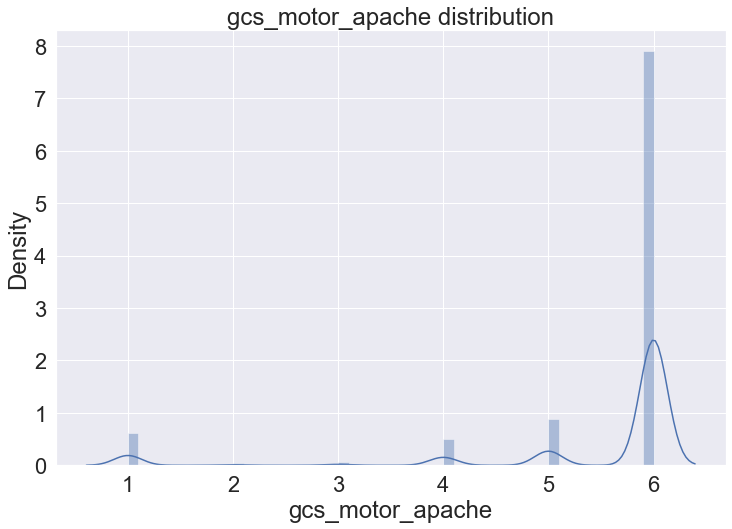

In [40]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['gcs_motor_apache'])
plt.xlabel('gcs_motor_apache')
plt.title ('gcs_motor_apache distribution')

**Note**: gcs_motor_apache - Fill with mode

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ph_apache distribution')

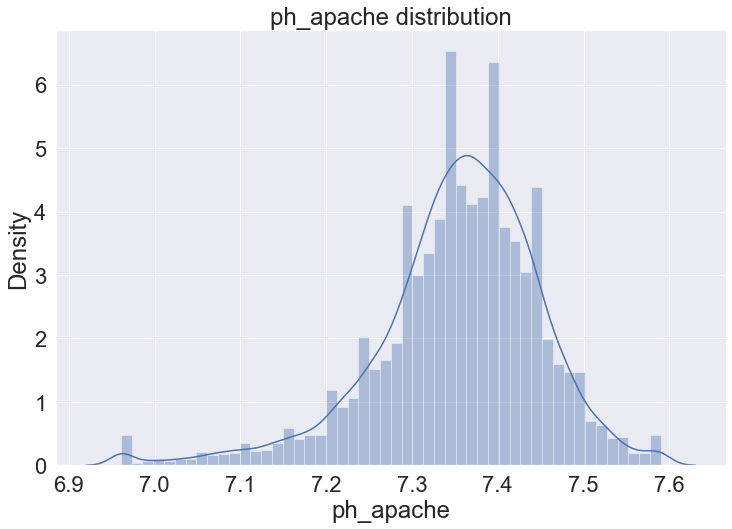

In [41]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['ph_apache'])
plt.xlabel('ph_apache')
plt.title ('ph_apache distribution')

**Note**: ph_apache - fill with median. 77% missing

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ventilated_apache distribution')

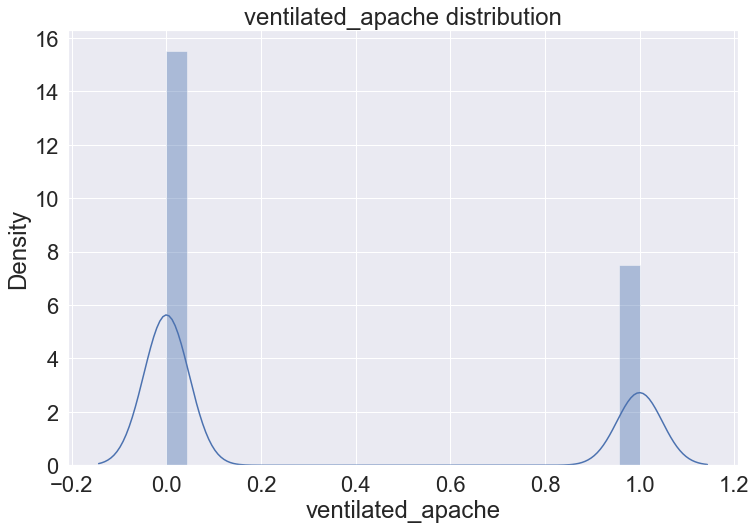

In [42]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['ventilated_apache'])
plt.xlabel('ventilated_apache')
plt.title ('ventilated_apache distribution')

**Note**: ventilated_apache - fill with 1

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'd1_temp_min distribution')

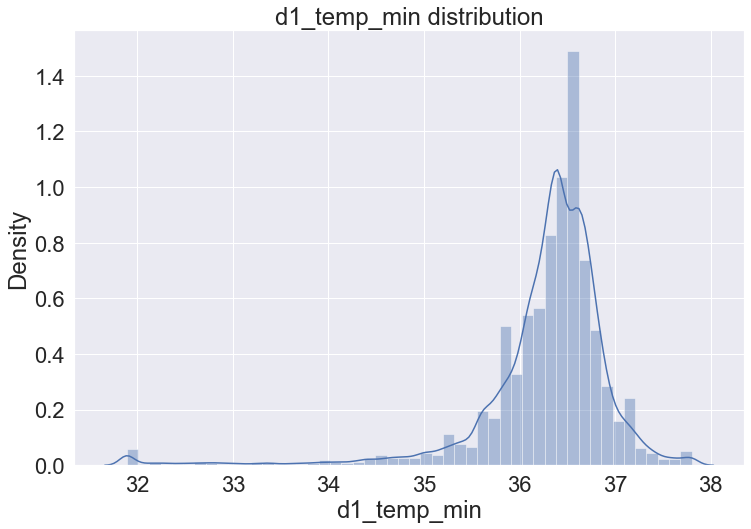

In [43]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['d1_temp_min'])
plt.xlabel('d1_temp_min')
plt.title ('d1_temp_min distribution')

**Note**: d1_temp_min 

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'lactate min distribution')

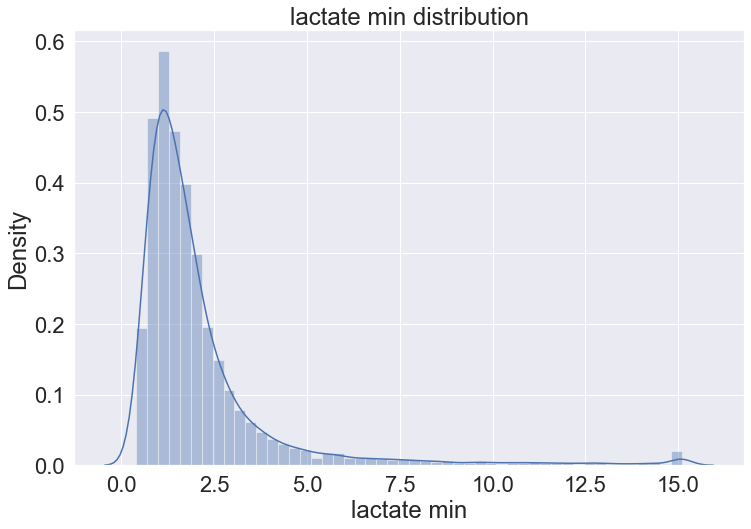

In [44]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['d1_lactate_min'])
plt.xlabel('lactate min')
plt.title ('lactate min distribution')

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'lactate max distribution')

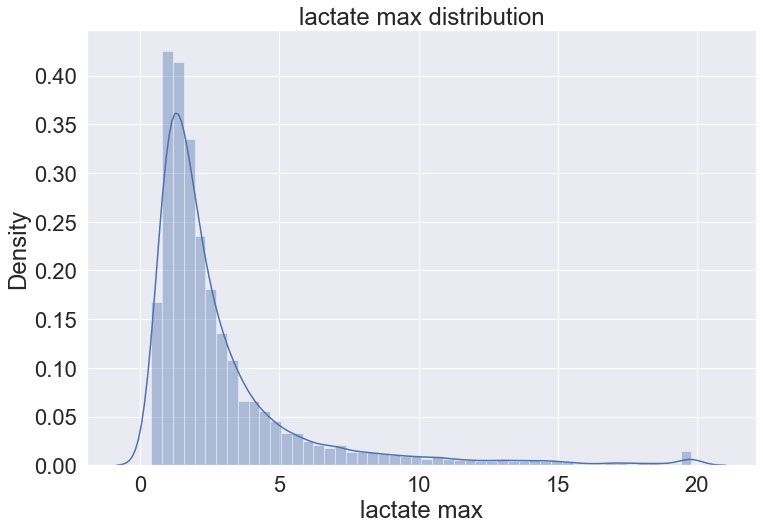

In [45]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['d1_lactate_max'])
plt.xlabel('lactate max')
plt.title ('lactate max distribution')

**Note**: Fill with median

C:\Users\matta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'h1_lactate_min distribution')

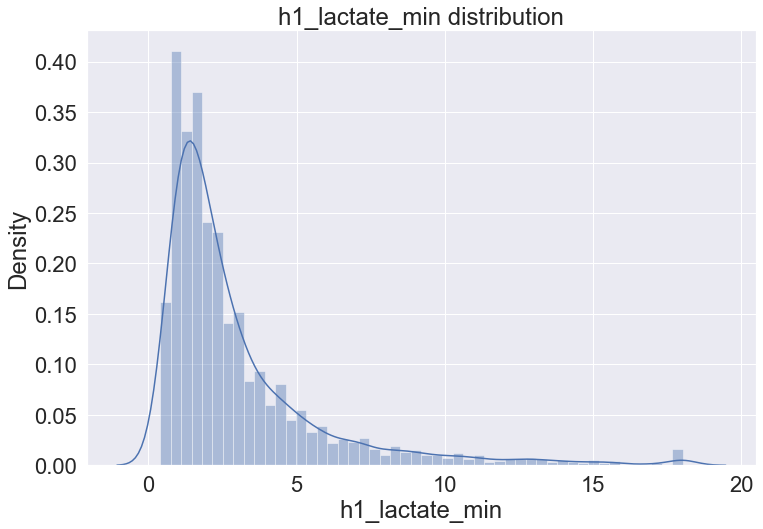

In [46]:
plt.figure (figsize = (12,8))
sns.distplot(hospital_train['h1_lactate_min'])
plt.xlabel('h1_lactate_min')
plt.title ('h1_lactate_min distribution')

**Note**: h1_lactate_min and max: fill with median

#### Checking null values and dealing with null values

In [47]:
nulls = hospital_train.isnull().sum().to_frame('nulls')   #check for null

In [48]:
nulls

,nulls
hospital_death,0
age,4228
bmi,3429
elective_surgery,0
gender,25
...,...
hepatic_failure,715
immunosuppression,715
leukemia,715
lymphoma,715


In [49]:
print(nulls.to_markdown())

|                               |   nulls |
|:------------------------------|--------:|
| hospital_death                |       0 |
| age                           |    4228 |
| bmi                           |    3429 |
| elective_surgery              |       0 |
| gender                        |      25 |
| pre_icu_los_days              |       0 |
| readmission_status            |       0 |
| weight                        |    2720 |
| albumin_apache                |   54379 |
| apache_2_diagnosis            |    1662 |
| apache_3j_diagnosis           |    1101 |
| apache_post_operative         |       0 |
| arf_apache                    |     715 |
| bilirubin_apache              |   58134 |
| bun_apache                    |   19262 |
| creatinine_apache             |   18853 |
| fio2_apache                   |   70868 |
| gcs_eyes_apache               |    1901 |
| gcs_motor_apache              |    1901 |
| gcs_unable_apache             |    1037 |
| gcs_verbal_apache             

**Note**: There are a LOT of columns with massive amounts of missing data. The code below will remove any columns with a set percentage of null values missing:

thresh = len(df) * .2<br>
df.dropna(thresh = thresh, axis = 1, inplace = True)

This is taken from: https://stackoverflow.com/questions/46939314/drop-columns-in-a-pandas-dataframe-based-on-the-of-null-values <br>
The function below is also from the same link above, which calculates how much percent of a column is null values

In [50]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [51]:
h = missing_values_table(hospital_train)

In [52]:
print(h.to_markdown())

|                               |   Missing Values |   % of Total Values |
|:------------------------------|-----------------:|--------------------:|
| hospital_death                |                0 |           0         |
| age                           |             4228 |           4.61003   |
| bmi                           |             3429 |           3.73884   |
| elective_surgery              |                0 |           0         |
| gender                        |               25 |           0.0272589 |
| pre_icu_los_days              |                0 |           0         |
| readmission_status            |                0 |           0         |
| weight                        |             2720 |           2.96577   |
| albumin_apache                |            54379 |          59.2926    |
| apache_2_diagnosis            |             1662 |           1.81217   |
| apache_3j_diagnosis           |             1101 |           1.20048   |
| apache_post_operative  

In [53]:
h2 = missing_values_table(hospital_test)
print(h2.to_markdown())

|                               |   Missing Values |   % of Total Values |
|:------------------------------|-----------------:|--------------------:|
| age                           |             1654 |           4.20779   |
| bmi                           |             1086 |           2.7628    |
| elective_surgery              |                0 |           0         |
| gender                        |               15 |           0.0381602 |
| pre_icu_los_days              |                0 |           0         |
| readmission_status            |                0 |           0         |
| weight                        |              764 |           1.94362   |
| albumin_apache                |            24650 |          62.7099    |
| apache_2_diagnosis            |              896 |           2.27943   |
| apache_3j_diagnosis           |              637 |           1.62054   |
| apache_post_operative         |                0 |           0         |
| arf_apache             

In [54]:
hospital_train.shape

(91713, 174)

## Algorithms that will be used in modelling:

- Logistic Regression
- KNN
- SVC
- Naive Bayes
- Random Forest Classifier
- Gradien Boosting Classifier
- XGBoost
- Bagging Classifier
- Scikit-learn's Stacking Classifier